Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries.  It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company.

Lithionpower has a variable pricing model based on driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driven per day etc.

**Objective:**
* You as a ML expert have  to create a cluster model where drivers can be grouped together based on the driving data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
from math import sqrt

#Visualisation frameworks
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/gabri/Desktop/Data Science/Python/Python for Data Science - Edureka/Module 10 - Unsupervised Learning/driver-data.csv')
print(df.shape)
df.head()

(4000, 3)


,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


Let's drop the ID column since it won't help us on clustering

In [3]:
id_df = df['id']

df = df.drop('id',axis=1)
df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [4]:
df.isna().sum()

mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


**Fields in Data**
* **mean_dist_day:** Mean distance driven by driver per day
* **mean_over_speed_perc:** Mean percentage of time a driver was > 5 mph over the speed limit

In [8]:
from sklearn.cluster import KMeans

In [13]:
# elbow method
wcss = []
for i in range(1,11):                                 
    kmeans = KMeans(n_clusters=i, init = "k-means++") 
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
print (wcss)                         

[12184626.129627967, 1316420.850947721, 992634.06067025, 719601.0859909927, 534638.2204334745, 372830.36458538676, 319763.30843818485, 276901.00621364167, 252765.32132101164, 230138.63325059137]


In [10]:
plt.plot(range(1,11),wcss, c='purple')
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title('Elbow Method')
plt.show()

array([0, 0, 0, ..., 1, 1, 1])

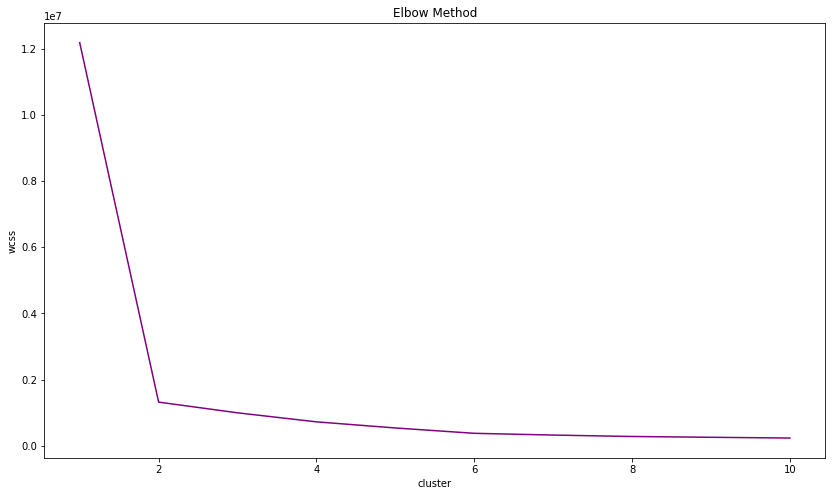

In [17]:
plt.figure(figsize=(14,8))
plt.plot(range(1,11),wcss, c='purple')
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title('Elbow Method')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=2, init='k-means++')
y_kmeans = kmeans.fit_predict(df)

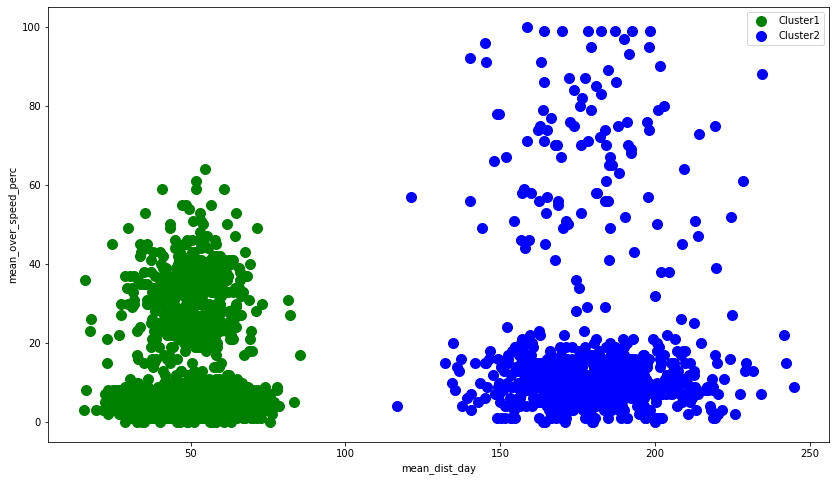

In [28]:
x = df.iloc[:,[0,1]].values
plt.figure(figsize=(14,8))

plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='green',label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.legend()
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()

In [32]:
df['id'] = id_df
df['cluster'] = y_kmeans
df['cluster'].value_counts()

0    3200
1     800
Name: cluster, dtype: int64

In [33]:
df

,mean_dist_day,mean_over_speed_perc,id,cluster
0,71.24,28,3423311935,0
1,52.53,25,3423313212,0
2,64.54,27,3423313724,0
3,55.69,22,3423311373,0
4,54.58,25,3423310999,0
...,...,...,...,...
3995,160.04,10,3423310685,1
3996,176.17,5,3423312600,1
3997,170.91,12,3423312921,1
3998,176.14,5,3423313630,1


Comparing mean percentage of time a driver was > 5 mph over the speed limit:

In [35]:
mean_speed_cluster0 = df[df['cluster'] == 0].mean_over_speed_perc.mean()
mean_speed_cluster0

8.82875

In [36]:
mean_speed_cluster1 = df[df['cluster'] == 1].mean_over_speed_perc.mean()
mean_speed_cluster1

18.29

Comparing mean distance driven by driver per day

In [37]:
mean_speed_cluster0 = df[df['cluster'] == 0].mean_dist_day.mean()
mean_speed_cluster1 = df[df['cluster'] == 1].mean_dist_day.mean()

print('Cluster 0:', mean_speed_cluster0, '\nCluster 1:', mean_speed_cluster1)

Cluster 0: 50.047634375 
Cluster 1: 180.017075
